# Cluster Comparison
C. Heiser, 2019

---
__The purpose of this notebook is to evaluate the effect of cluster annotation on our local and neighborhood structural preservation metrics. The *Samusik_01* dataset from the [UMAP _Nat. Biotech._ paper (Becht, _et al._ 2018)](https://www.nature.com/articles/nbt.4314) is used to evaluate previously annotated cluster IDs versus those generated locally by the Louvain algorithm__

In [1]:
import sys
sys.path.append('../')
from fcc_utils import *

In [ ]:
# reload functions when editing file
del sys.modules['fcc_utils']
from fcc_utils import *

In [2]:
# ignore numba deprecation warnings given by sc.pp.neighbors()
import numba
import warnings
warnings.simplefilter('ignore', numba.errors.NumbaWarning)
warnings.simplefilter('ignore', numba.errors.NumbaDeprecationWarning)
warnings.simplefilter('ignore', numba.errors.NumbaPerformanceWarning)

In [ ]:
sc.settings.set_figure_params(dpi=100)

---
### Samusik_01 Hematopoeitic CyTOF Dataset
[FlowRepository FR-FCM-ZZPH](https://flowrepository.org/id/FR-FCM-ZZPH)

In [3]:
%time sam = sc.read('../inputs/samusik_01_labeled.h5ad')

CPU times: user 649 ms, sys: 48.4 ms, total: 697 ms
Wall time: 753 ms


In [20]:
%time sc.tl.rank_genes_groups(sam, 'clusterID', method='wilcoxon')

CPU times: user 415 ms, sys: 15.2 ms, total: 430 ms
Wall time: 430 ms


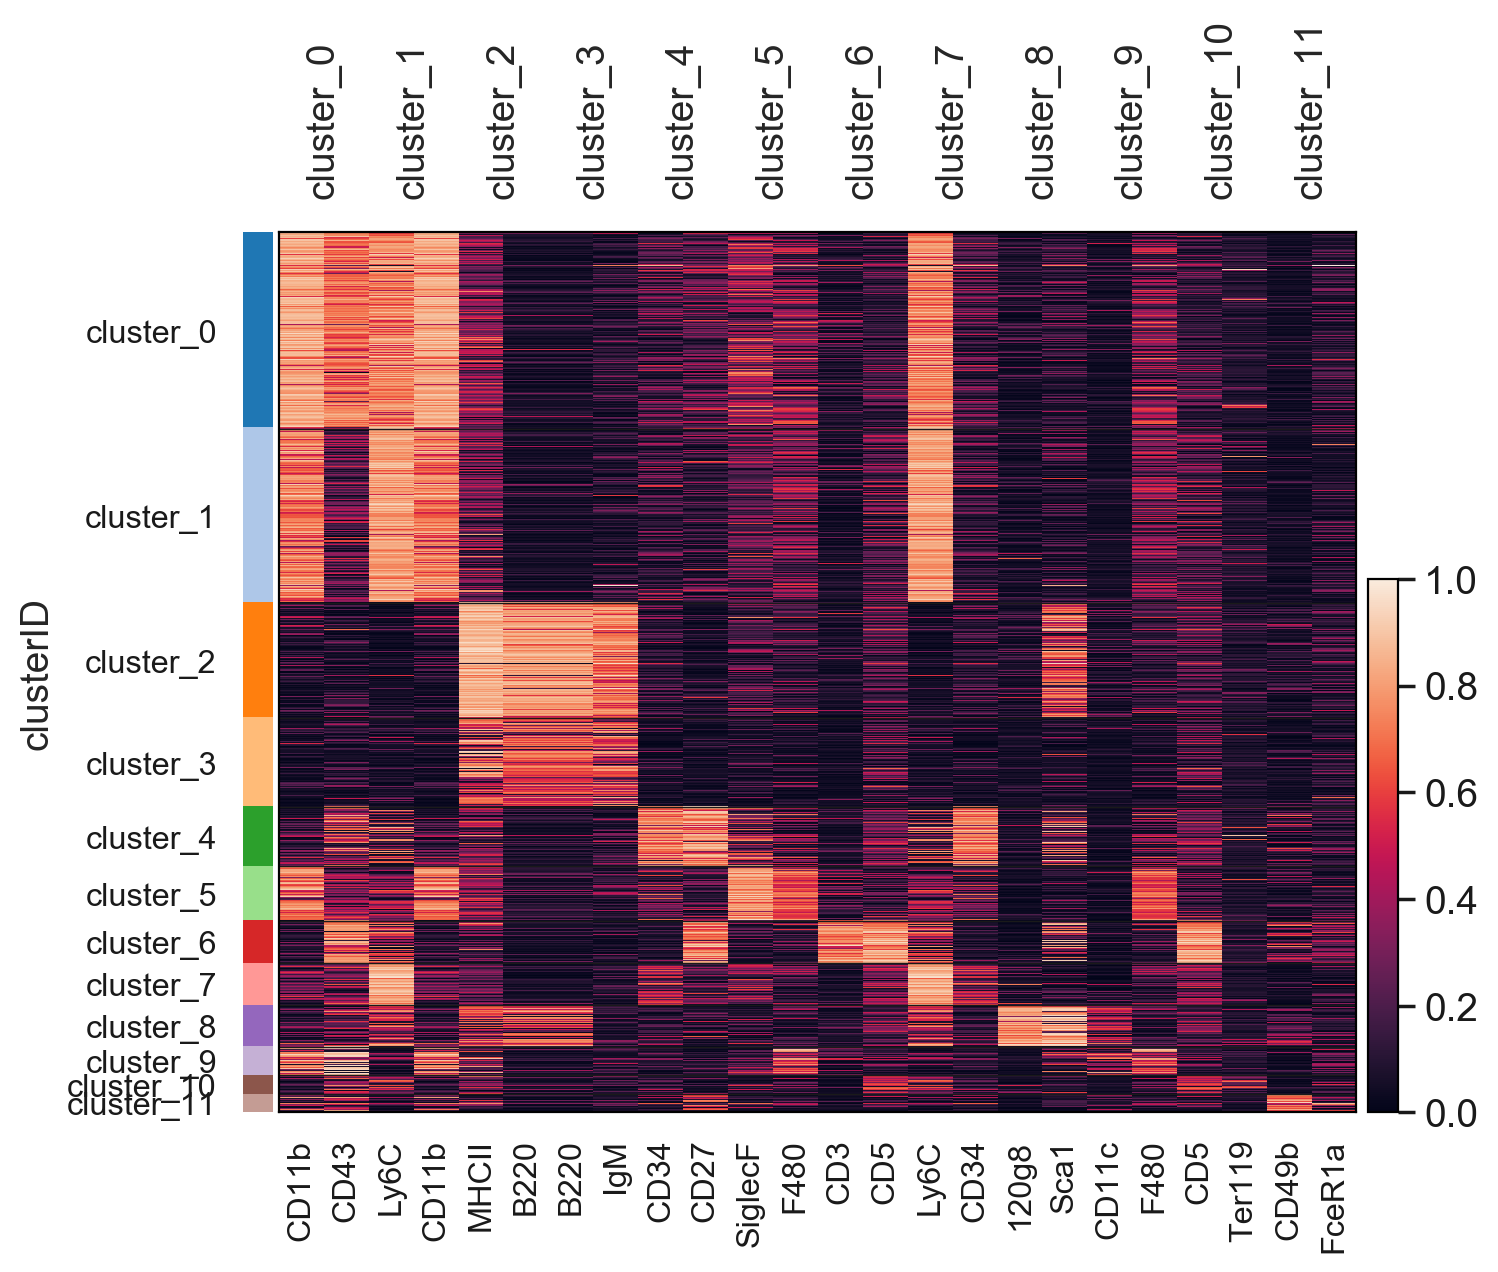

In [23]:
sc.pl.rank_genes_groups_heatmap(sam, n_genes=2, standard_scale='var', use_raw=False, dendrogram=False)

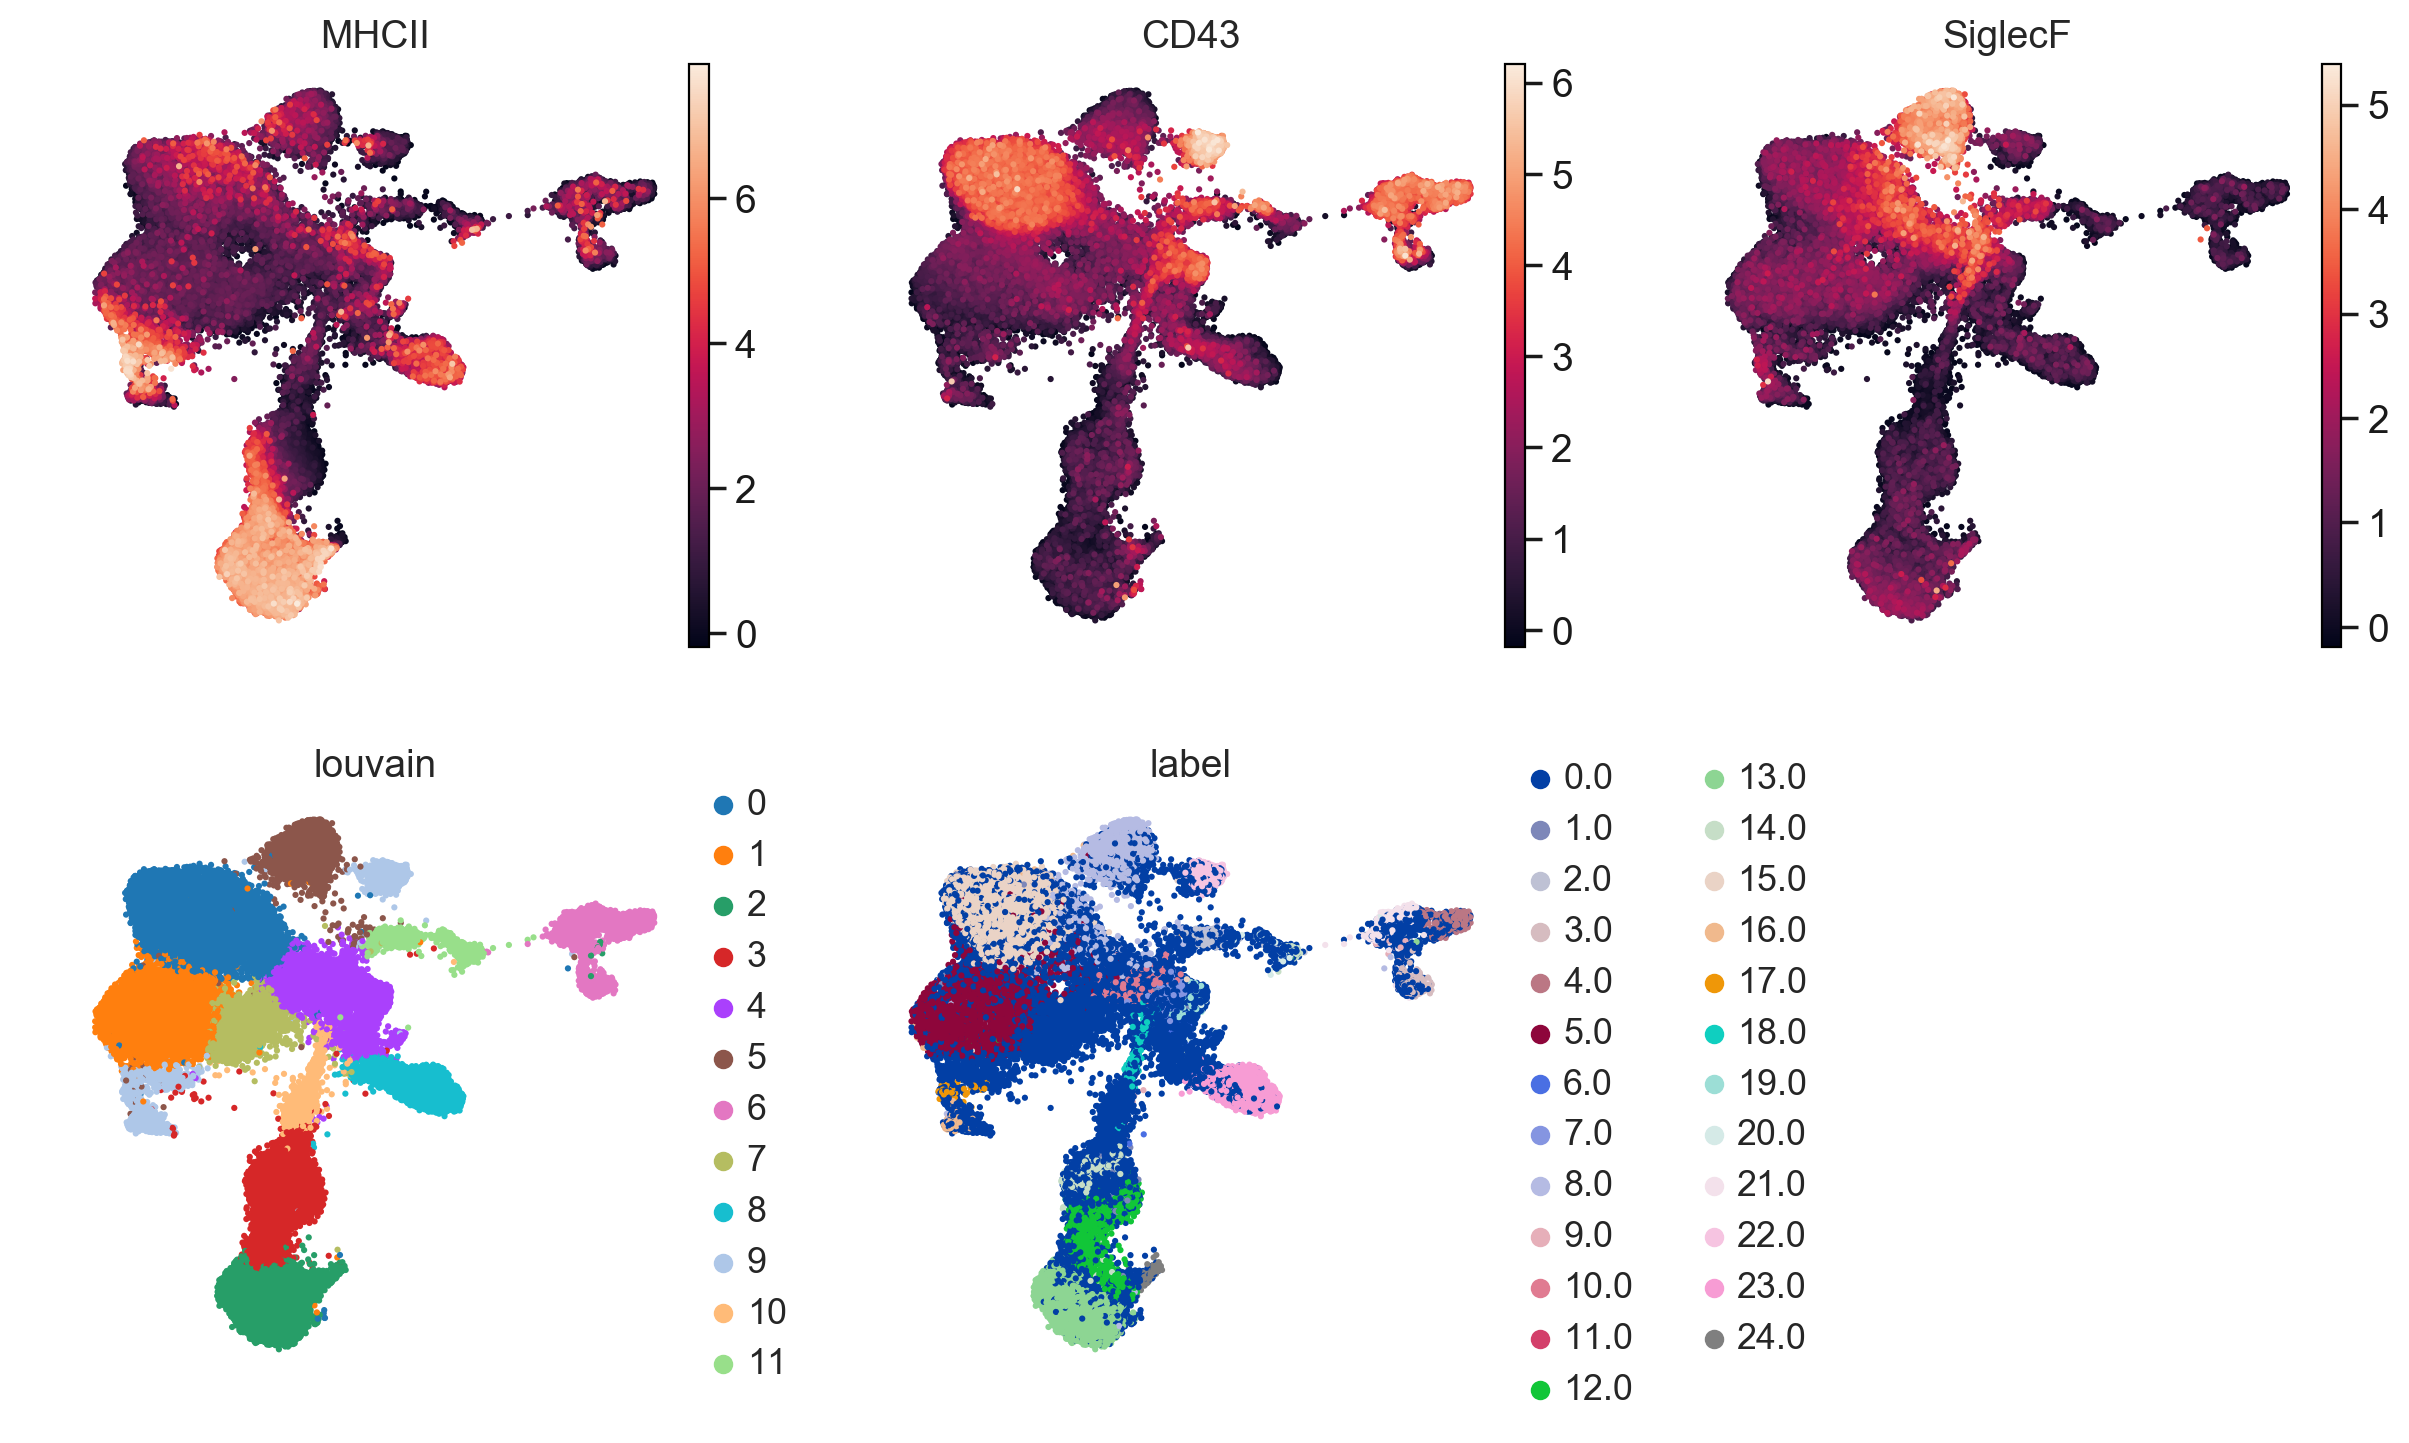

In [29]:
sc.pl.umap(sam, color=['MHCII','CD43','SiglecF','louvain','label'], frameon=False, size=20, ncols=3)

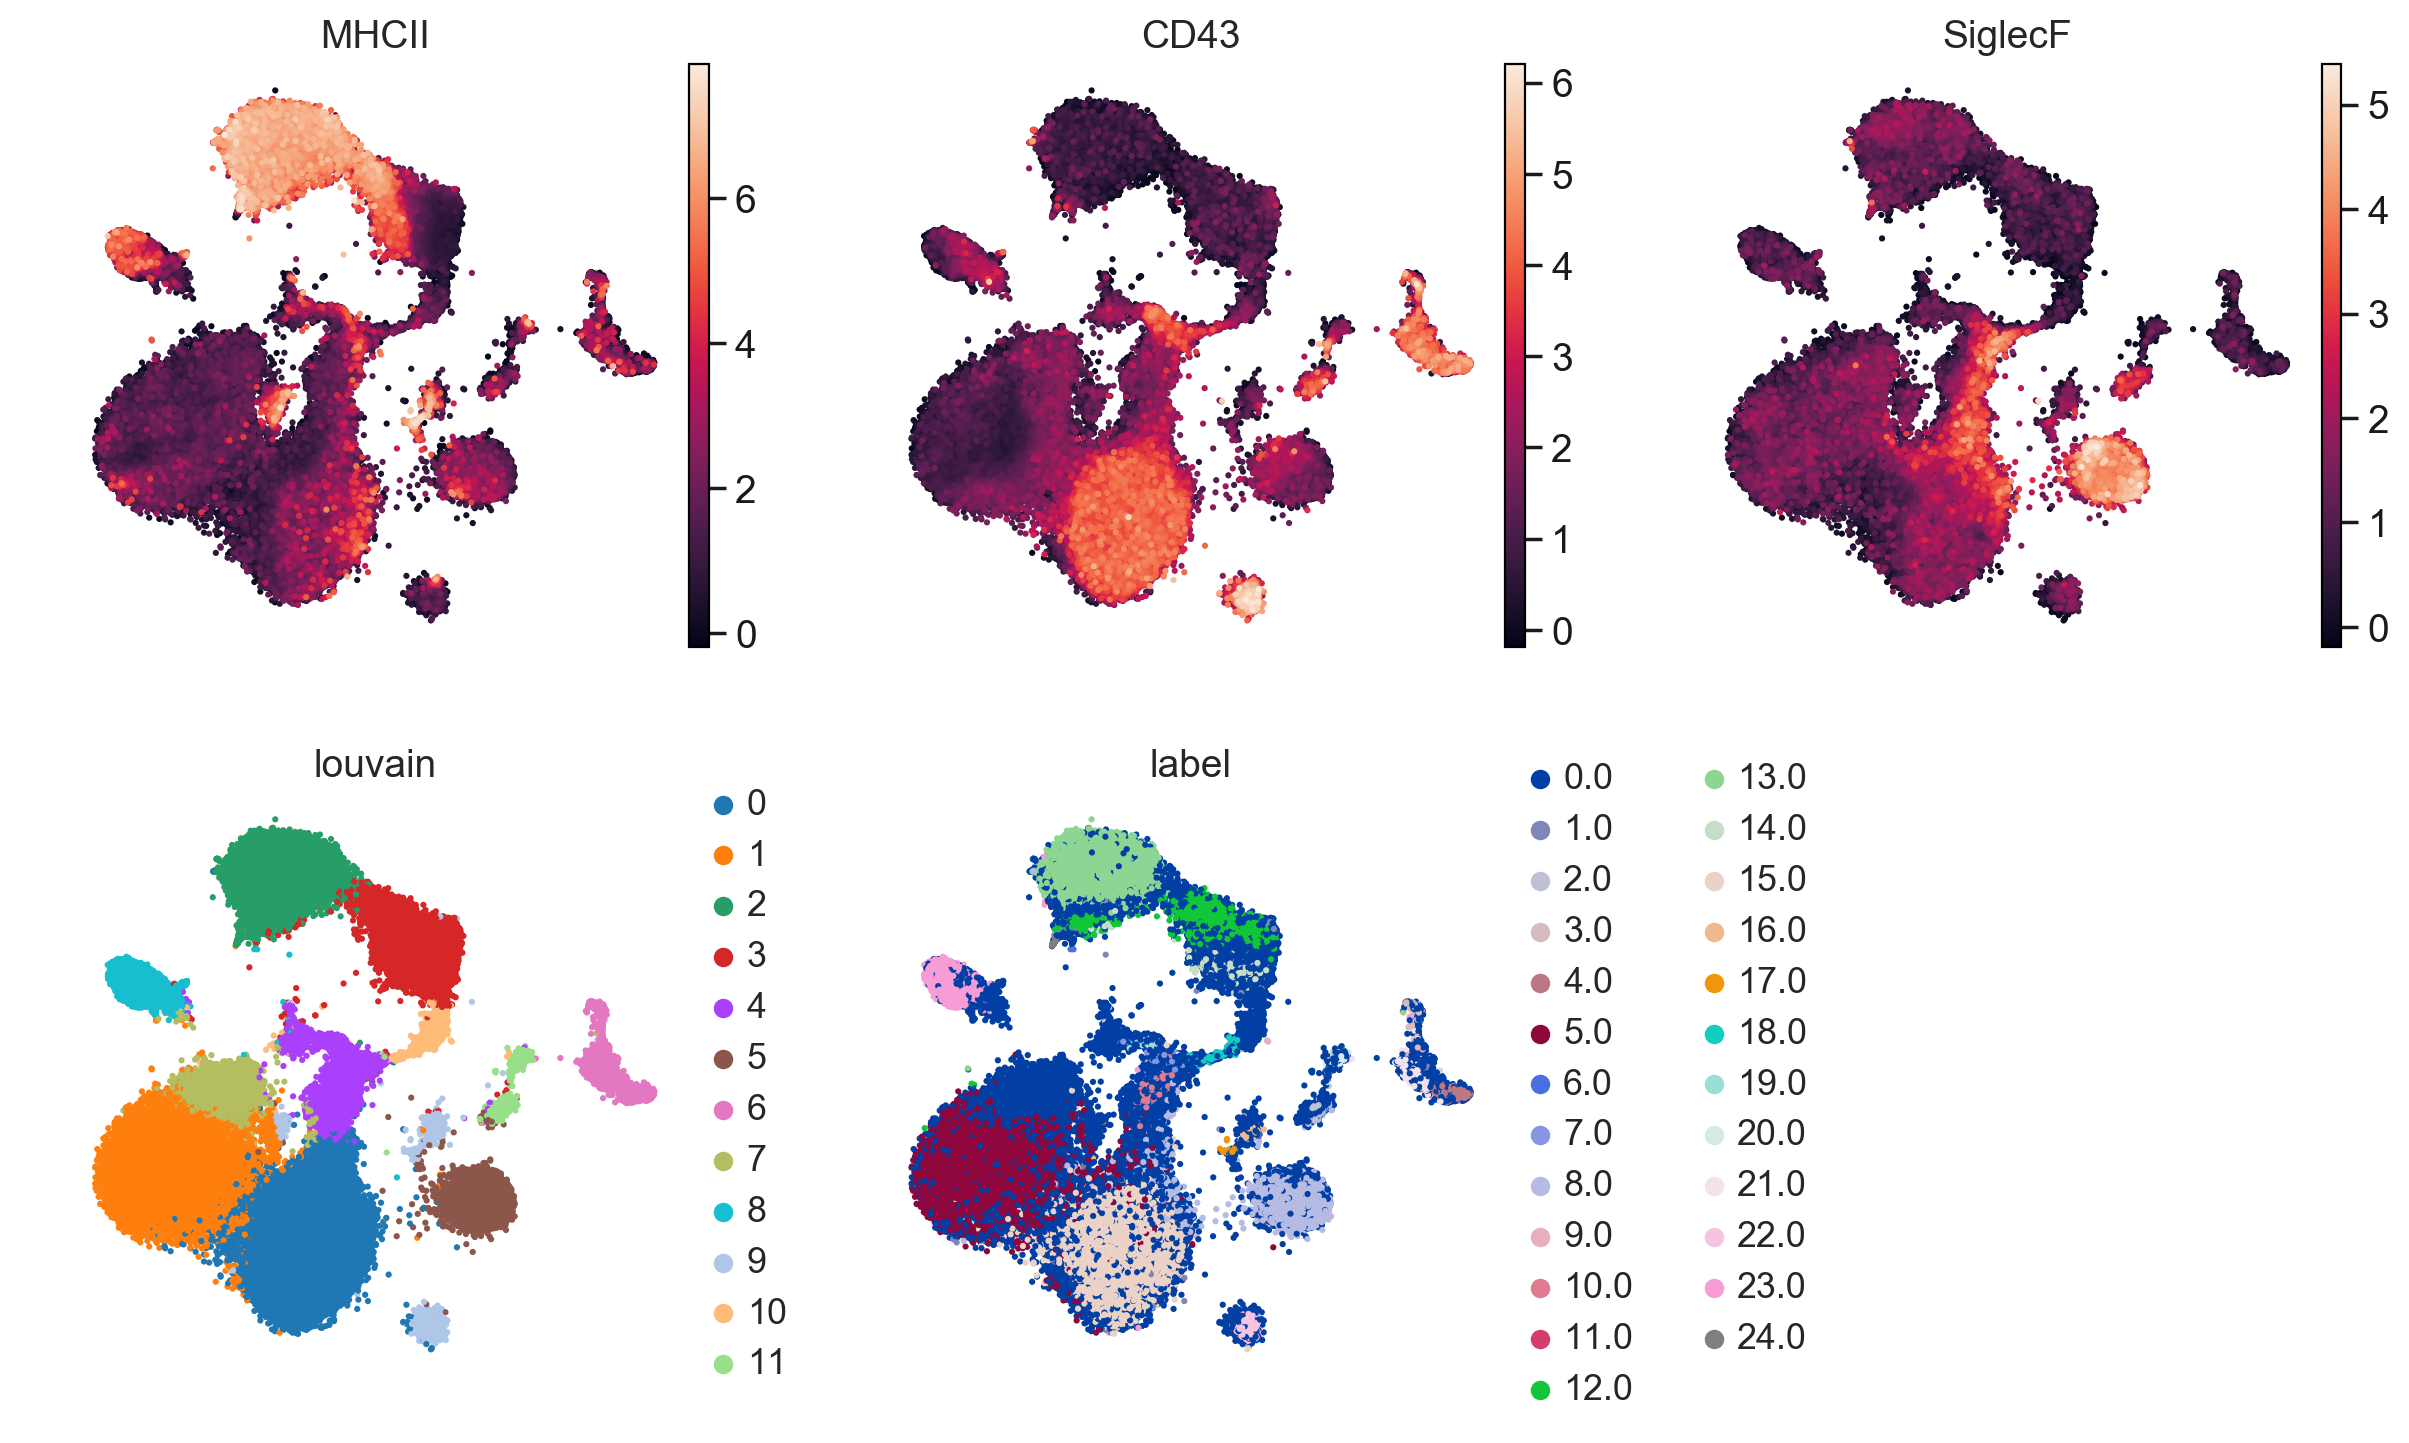

In [30]:
sc.pl.tsne(sam, color=['MHCII','CD43','SiglecF','louvain','label'], frameon=False, size=20, ncols=3)

In [32]:
sns.set(style = 'white')

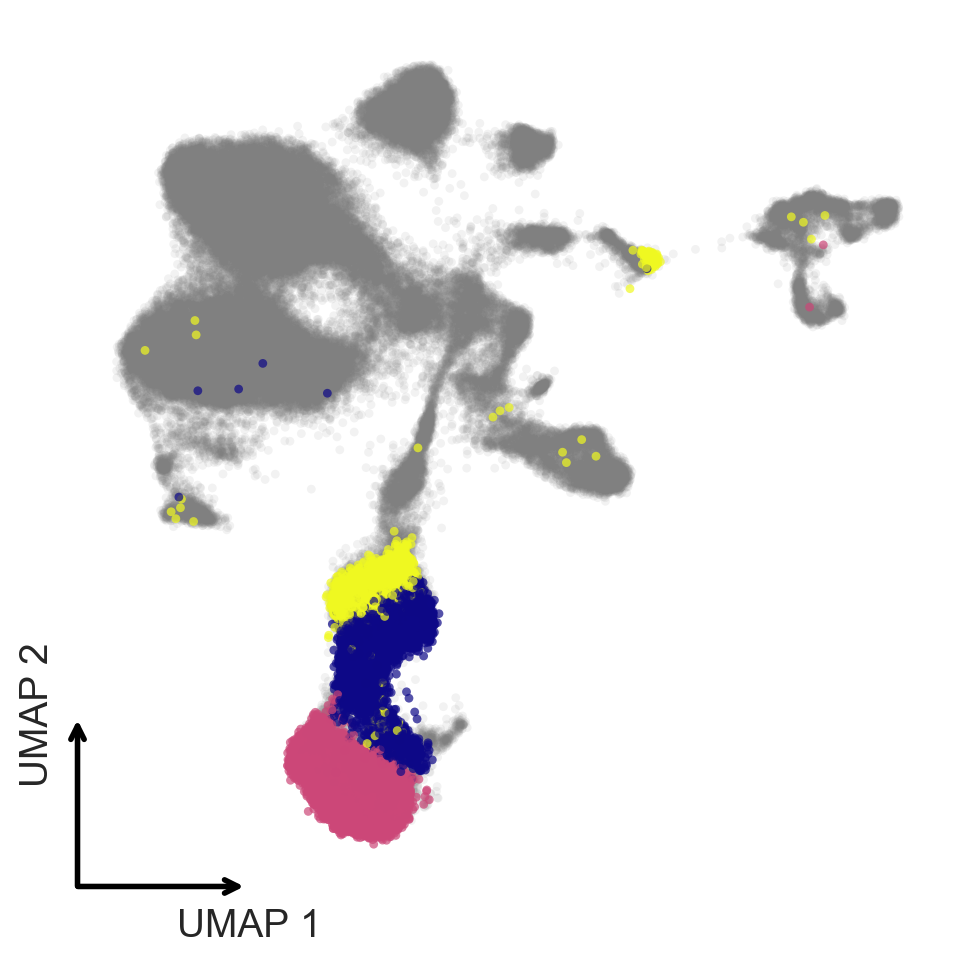

In [42]:
DR_plot(dim_name='UMAP').plot_IDs(sam, use_rep='X_umap', obs_col='label', IDs=[12,13,14], pt_size=10)#, save_to='outputs/samusik_UMAP_label.png')

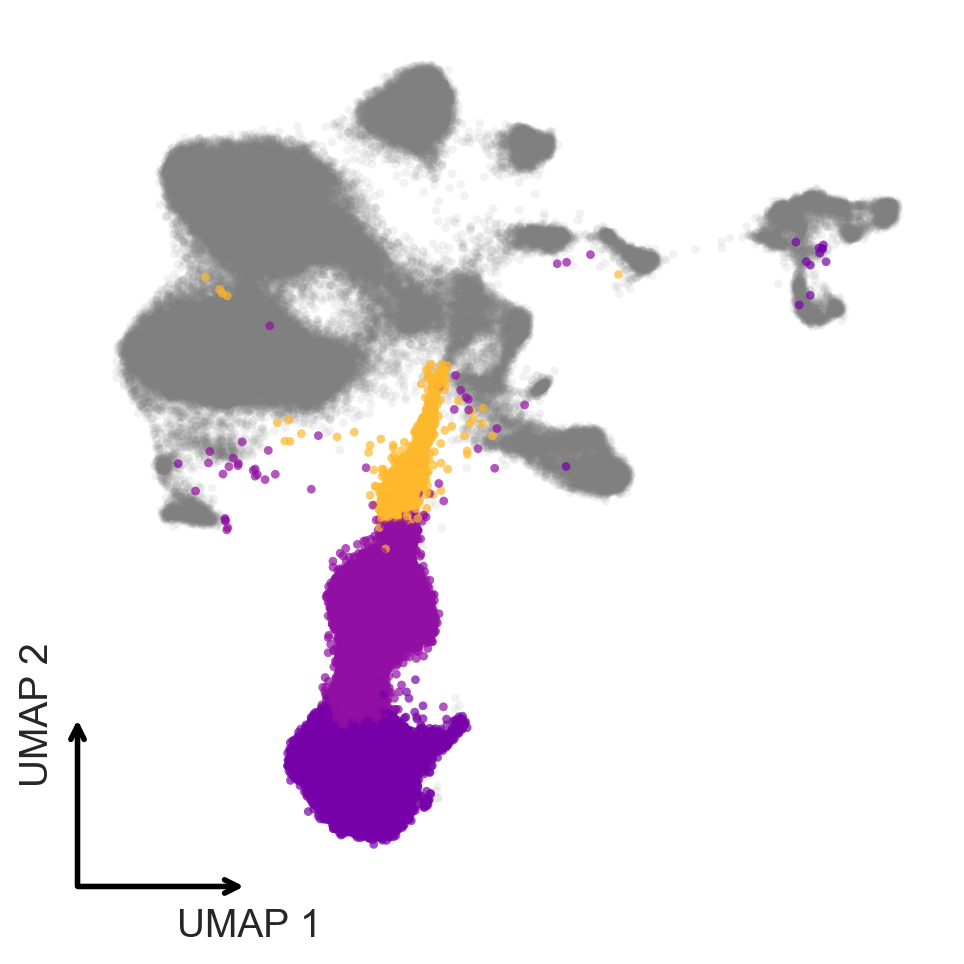

In [38]:
DR_plot(dim_name='UMAP').plot_IDs(sam, use_rep='X_umap', obs_col='clusterID', IDs=['cluster_2','cluster_3','cluster_10'], pt_size=10)#, save_to='outputs/samusik_UMAP_clu.png')

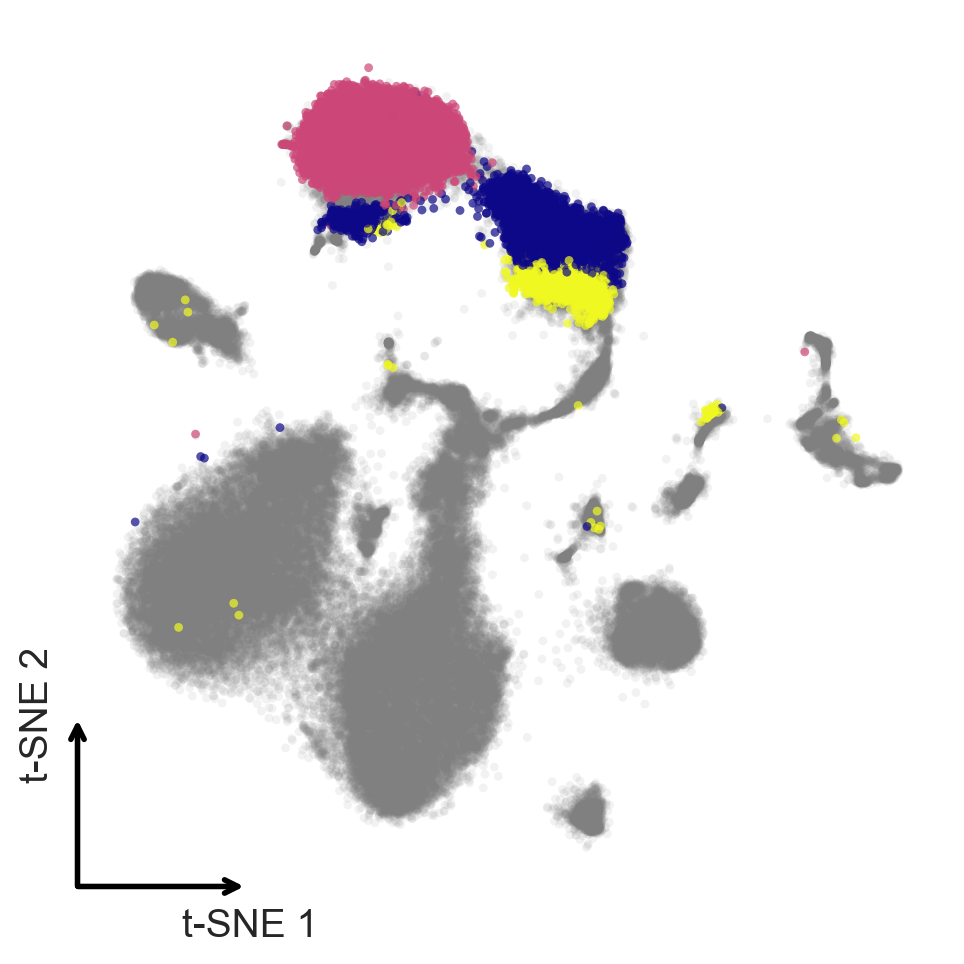

In [43]:
DR_plot(dim_name='t-SNE').plot_IDs(sam, use_rep='X_tsne', obs_col='label', IDs=[12,13,14], pt_size=10)#, save_to='outputs/samusik_UMAP_label.png')

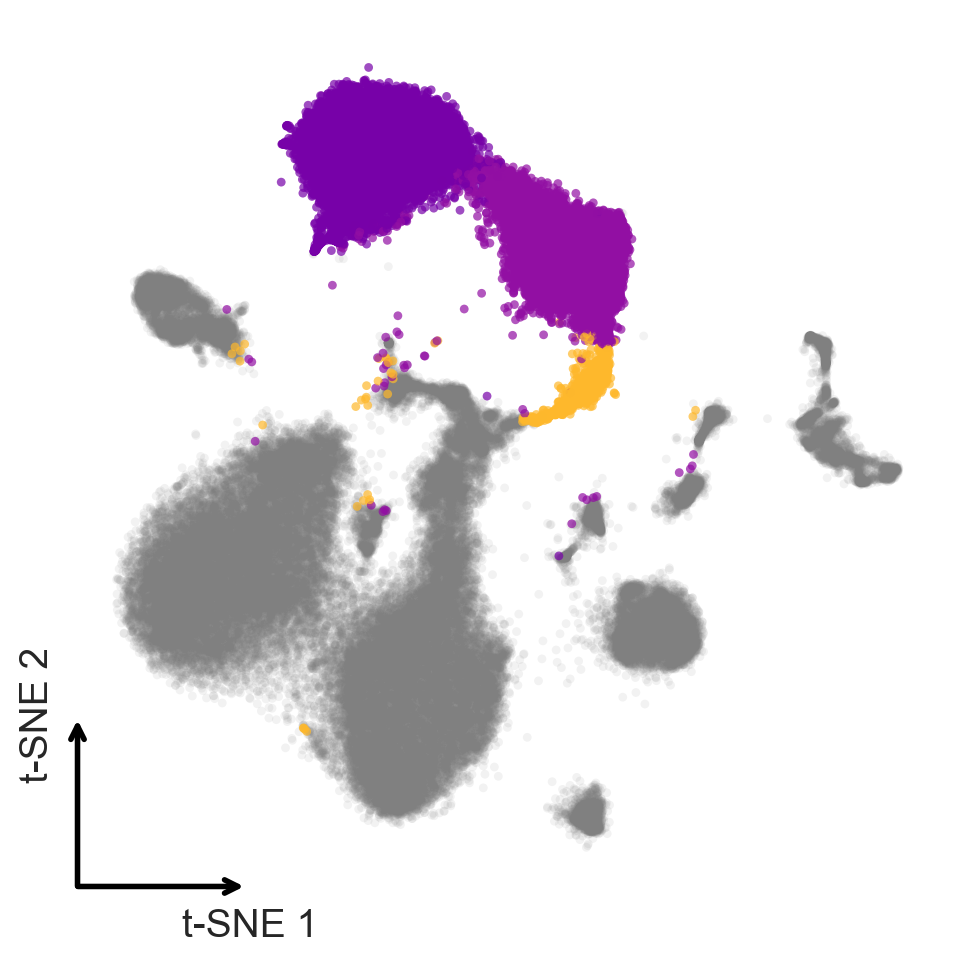

In [44]:
DR_plot(dim_name='t-SNE').plot_IDs(sam, use_rep='X_tsne', obs_col='clusterID', IDs=['cluster_2','cluster_3','cluster_10'], pt_size=10)#, save_to='outputs/samusik_UMAP_clu.png')

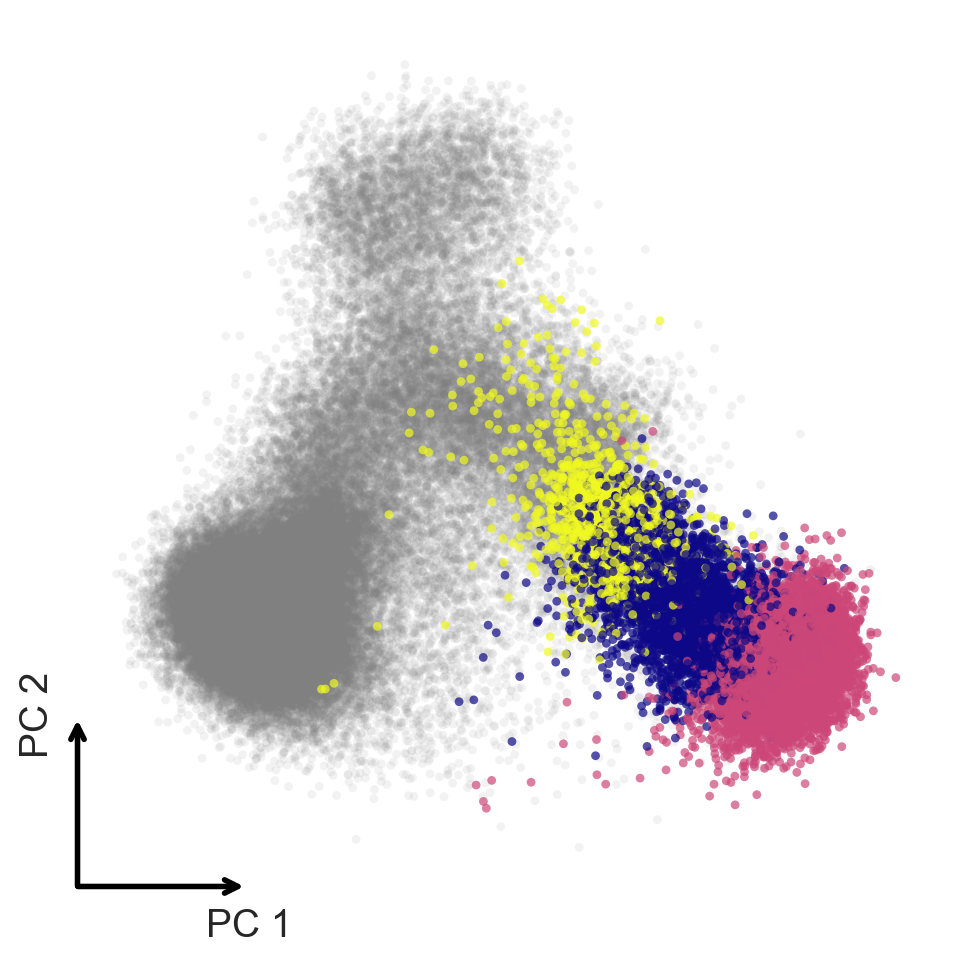

In [51]:
DR_plot(dim_name='PC').plot_IDs(sam, use_rep='X_pca', obs_col='label', IDs=[12,13,14], pt_size=10)#, save_to='outputs/samusik_UMAP_label.png')

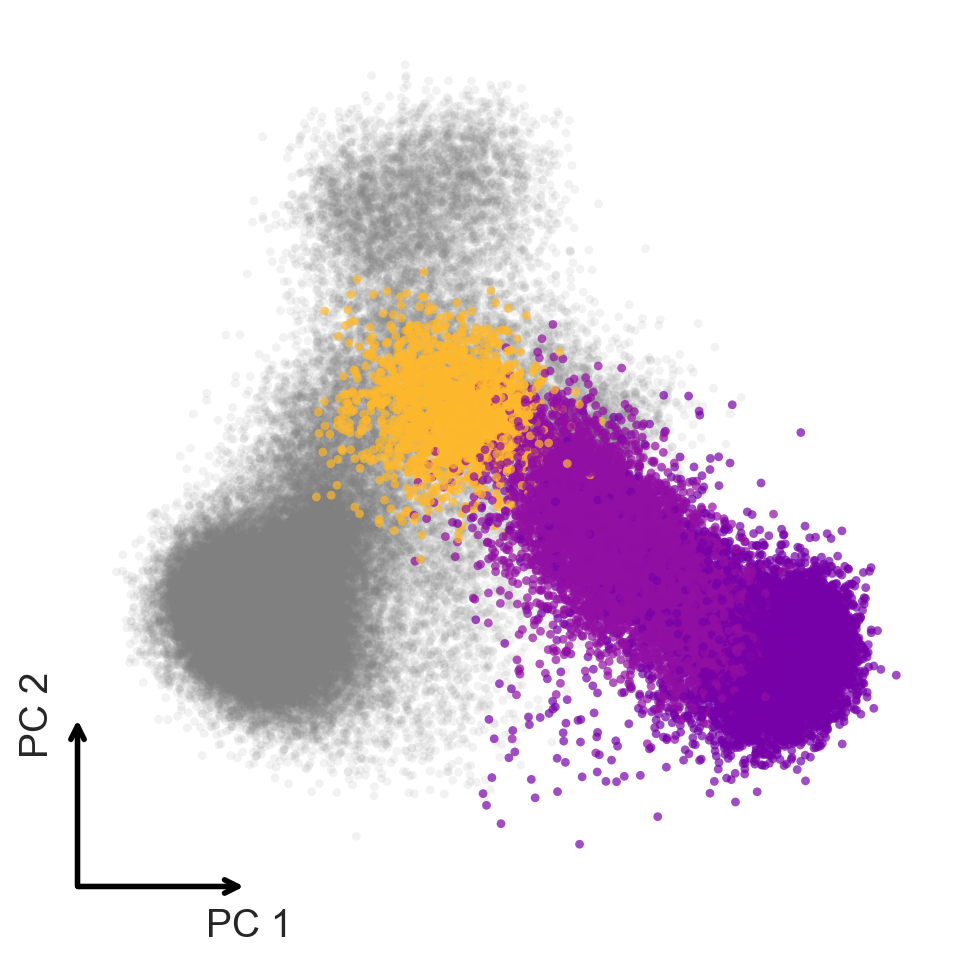

In [52]:
DR_plot(dim_name='PC').plot_IDs(sam, use_rep='X_pca', obs_col='clusterID', IDs=['cluster_2','cluster_3','cluster_10'], pt_size=10)#, save_to='outputs/samusik_UMAP_clu.png')

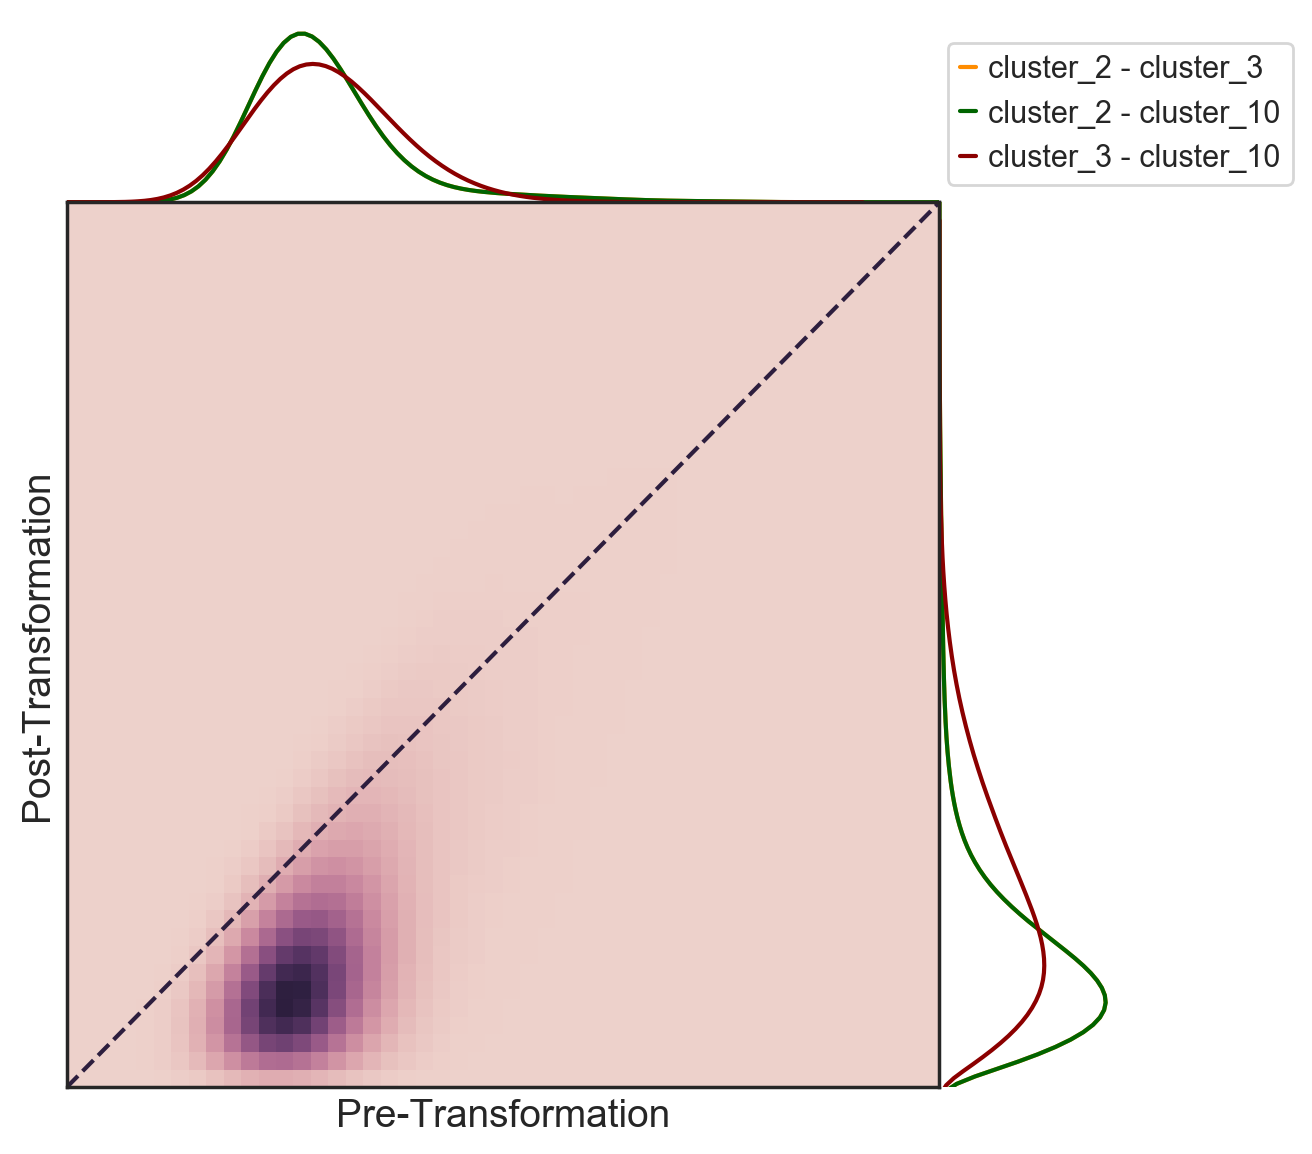

In [50]:
corr, EMD = cluster_arrangement_sc(adata=sam, IDs=['cluster_2','cluster_3','cluster_10'], obs_col='clusterID', pre=sam.X, post=sam.obsm['X_pca'])

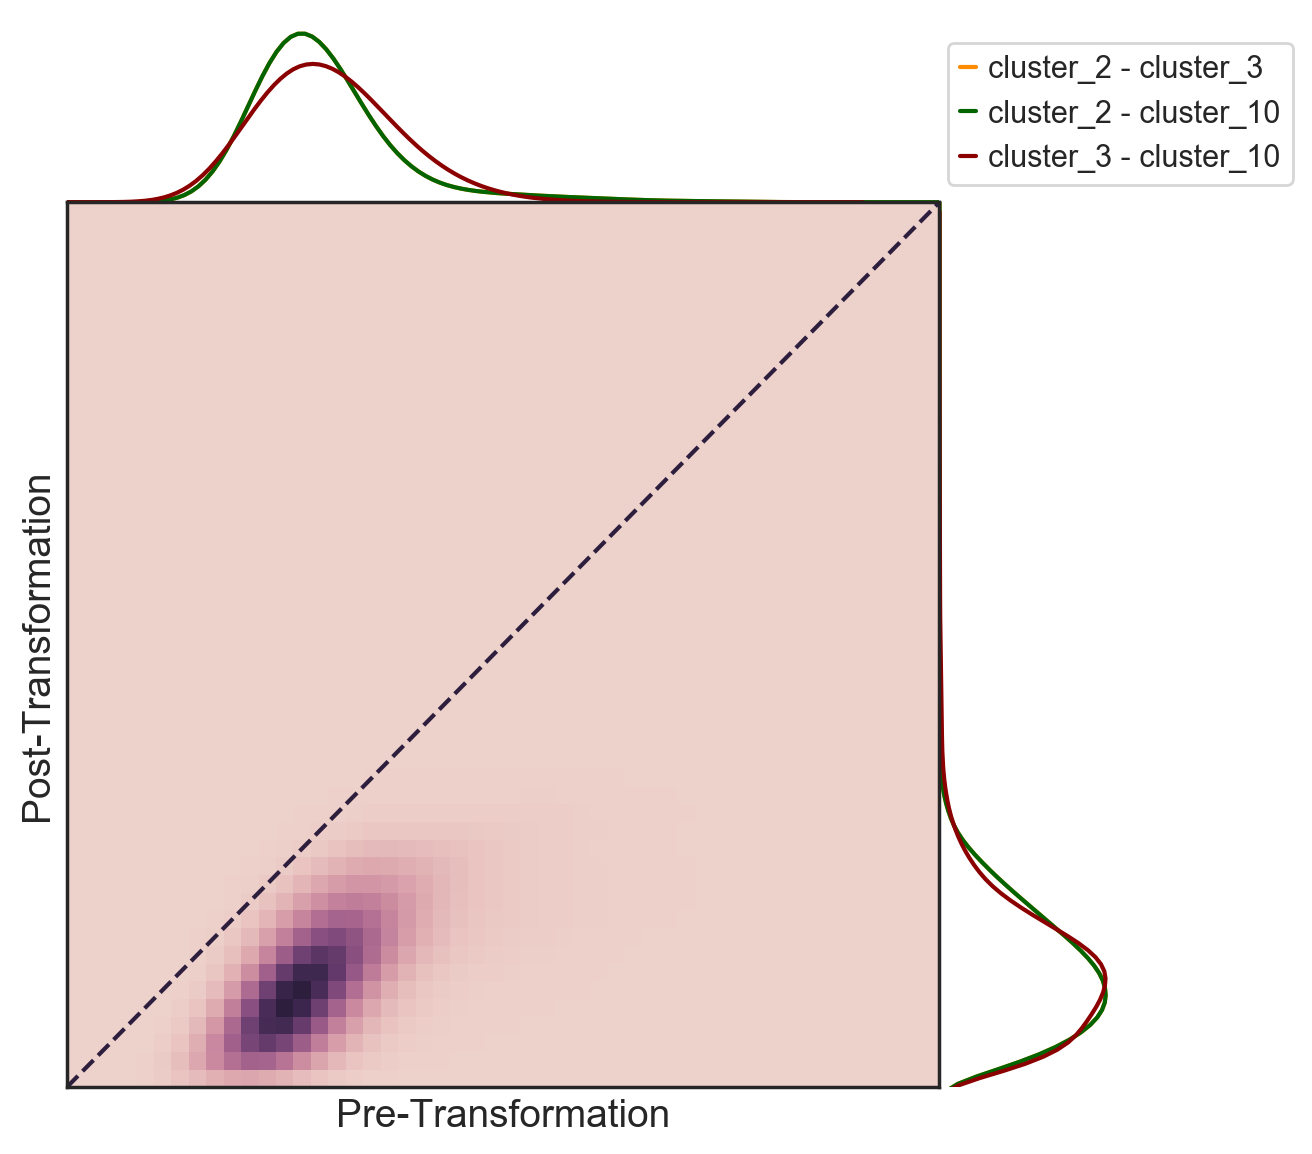

In [53]:
corr, EMD = cluster_arrangement_sc(adata=sam, IDs=['cluster_2','cluster_3','cluster_10'], obs_col='clusterID', pre=sam.X, post=sam.obsm['X_tsne'])

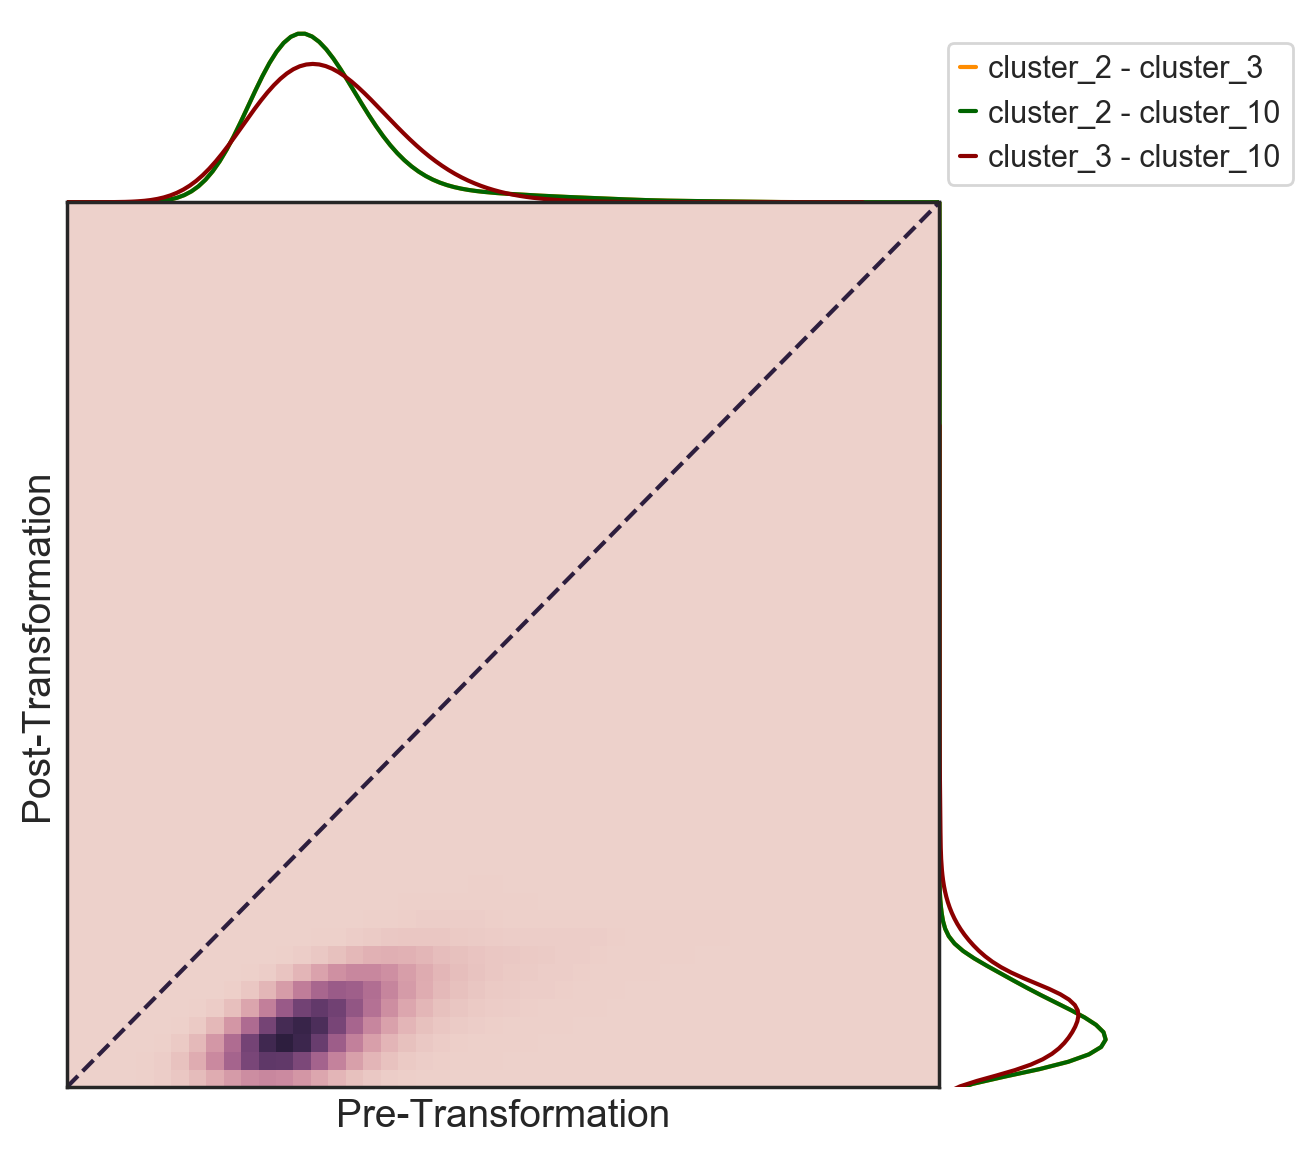

In [54]:
corr, EMD = cluster_arrangement_sc(adata=sam, IDs=['cluster_2','cluster_3','cluster_10'], obs_col='clusterID', pre=sam.X, post=sam.obsm['X_umap'])